# Compound classes

In [1]:
import chembl_webresource_client

In [2]:
compounds = chembl_webresource_client.CompoundResource()

compounds.logger.setLevel(logging.ERROR)

In [3]:
data = pd.read_pickle('data.pkl')

data.shape

(1317, 30)

In [4]:
compound_classes = [
      {'name': 'DHP', 'smarts': ['[Nv3H]1C=[C,Nv3]C(-a)[C,Nv3]=C1', '[Nv3]1=CC(=C([OH])O)C(-a)[C,Nv3]=C1', '[Nv3]1=C[Nv3H]C(-a)[C,Nv3]=C1']}
    , {'name': 'PAA', 'smarts': ['a[CX4][CX4][CX4][CX4][Nv3][CX4][CX4]a']}
    , {'name': 'BTZ', 'smarts': ['c1(aaaa2)c2[Nv3]C-,=CC(-a)[C,S]1', 'c1(aaaa2)c2[Nv3]=CC(=C([OH])O)C(-a)[C,S]1', 'c1(aaaa2)c2ncC-,=C(-a)S1']}
]

for record in compound_classes: record['queries'] = [Chem.MolFromSmarts(x) for x in record['smarts'] + ['[Pu]']] # NB Add a dummy query to clear substructure highlighting

def f(x):
    
    for record in compound_classes:
        
        for query in record['queries']:
            
            if x.HasSubstructMatch(query): return record['name']
    else:
    
        return ''

In [5]:
def add_compound_class(df):
    
    df['smiles'] = df['parent_cmpd_chemblid'].apply(lambda x: compounds.get_one(x)['smiles'])

    PandasTools.AddMoleculeColumnToFrame(df, 'smiles')

    df.drop('smiles', axis=1, inplace=True)

    df['compound_class'] = df['ROMol'].apply(f)

    df.set_index('parent_cmpd_chemblid', inplace=True)

    return df

In [6]:
# Test examples...
# Nifedipine (DHP), Verapamil (PAA), Diltiazem (DTZ) and DTZ analogues/alternate tautomers

df0 = pd.DataFrame({'parent_cmpd_chemblid': ['CHEMBL193', 'CHEMBL23692', 'CHEMBL6966', 'CHEMBL23', 'CHEMBL100709', 'CHEMBL158853', 'CHEMBL33096']})

,ROMol,compound_class
parent_cmpd_chemblid,,
CHEMBL193,,DHP
CHEMBL23692,,DHP
CHEMBL6966,,PAA
CHEMBL23,,BTZ
CHEMBL100709,,BTZ
CHEMBL158853,,BTZ
CHEMBL33096,,BTZ

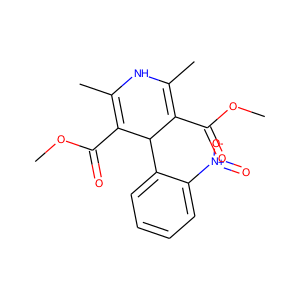
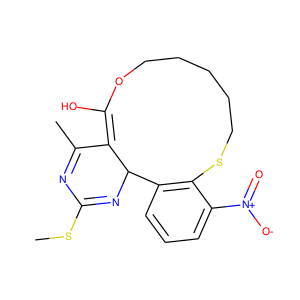
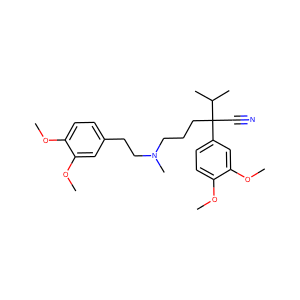
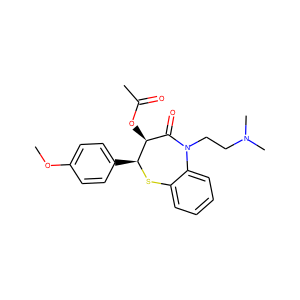
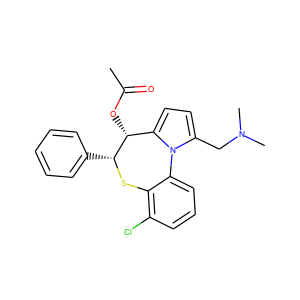
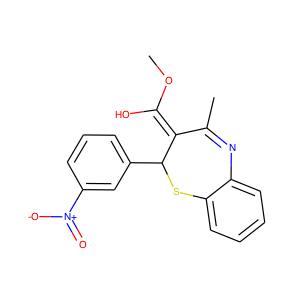
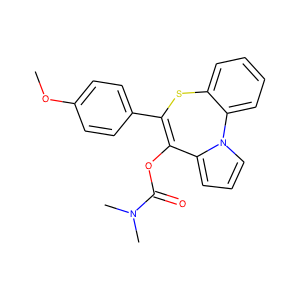

In [7]:
add_compound_class(df0)

In [8]:
# Real examples...

df1 = data[['parent_cmpd_chemblid']].drop_duplicates()

df1.shape

(897, 1)

In [9]:
df1 = add_compound_class(df1)

,ROMol,compound_class
parent_cmpd_chemblid,,
CHEMBL138302,,PAA
CHEMBL343771,,PAA
CHEMBL6966,,PAA
CHEMBL29067,,DHP
CHEMBL314646,,DHP

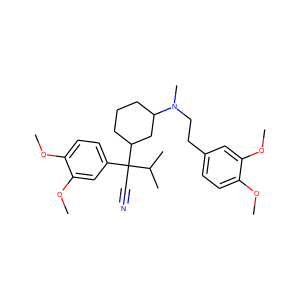
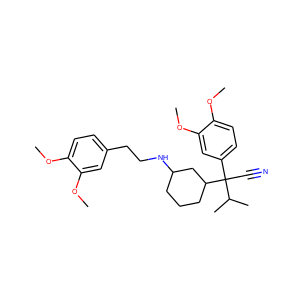
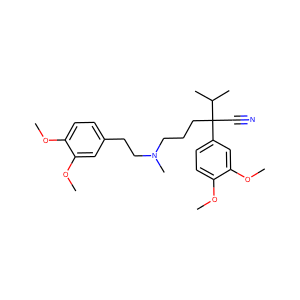
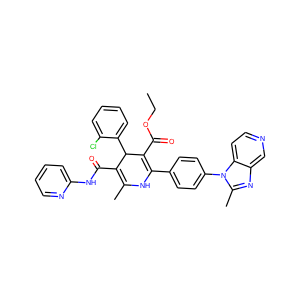
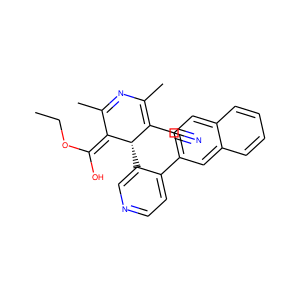

In [10]:
df1.head(5)

In [11]:
df1.to_pickle('compound_class.pkl')